<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Experimentation_on_some_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Lib

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from mlxtend.plotting import plot_decision_regions

In [28]:
from sklearn.datasets import make_classification

# make dataset with large number of points

X,y = make_classification(n_samples=50000,n_features=10,
                          n_informative=8,n_redundant=2,
                          n_classes=3,random_state=42)

In [29]:
# shape of the data
print(X.shape)

(50000, 10)


In [30]:
# convert X into df and y into series

X = pd.DataFrame(X)
y = pd.Series(y)

X.head()

,0,1,2,3,4,5,6,7,8,9
0,5.917631,-1.840343,1.291110,-1.671456,0.916127,-2.422203,-1.866961,-0.171637,2.231935,-3.442141
1,-3.621187,-0.412989,-0.671068,3.128067,2.402082,3.066851,2.287257,0.357358,-0.789877,1.854585
2,-14.573050,2.502709,1.862791,-6.787159,1.152276,2.748987,1.902314,4.107699,-2.640881,2.996940
3,1.457354,1.021296,-0.741734,-1.055687,0.699557,0.383764,-1.471437,0.028949,0.252979,-1.430022
4,8.974339,0.950341,1.806609,3.407704,-0.548564,-0.032830,-2.040749,-5.054362,-0.684435,0.189011


In [31]:
# number of classes in target
pd.Series(y).unique()

array([2, 1, 0])

<Axes: >

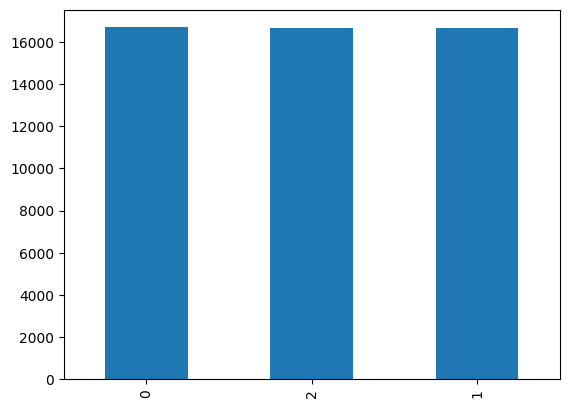

In [32]:
# class distribution of target

y.value_counts().plot(kind='bar')

## Q1

**Q1 When addressing overfitting in ML models which approach is considered effective**:
1. Reducing the amount of training data
2. Adding more features to the model.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# record all the train and test scores

train_scores = []
test_scores = []

### Random Forest clf with data having 3 classes (Sample_size=50000,n_features=10)

In [35]:
# split the data into train test split

def do_train_test_split(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

    return X_train,X_test,y_train,y_test

In [36]:
%time
# train a random forest model and get acc scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = do_train_test_split(X,y)

rf = RandomForestClassifier()

# train on X_train,y_train
rf.fit(X_train,y_train)

# do the predictions
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train)

# calculate the scores
train_acc = accuracy_score(y_train,pred_train)
test_acc = accuracy_score(y_test,pred_test)

print('The train scores are',train_acc)
print('The test scores are',test_acc)
train_scores.append(train_acc)
test_scores.append(test_acc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
The train scores are 1.0
The test scores are 0.9605


### Random Forest clf with data having 3 classes (Sample_size=5000,n_features=10)

In [37]:
# reduce the training data and calculate the scores again

X_reduced,y_reduced = make_classification(n_samples=5000,n_features=10,
                          n_informative=8,n_redundant=2,
                          n_classes=3,random_state=42)

In [38]:
%time
# train a random forest model and get acc scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = do_train_test_split(X_reduced,y_reduced)

rf = RandomForestClassifier()

# train on X_train,y_train
rf.fit(X_train,y_train)

# do the predictions
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train)

# calculate the scores
train_acc = accuracy_score(y_train,pred_train)
test_acc = accuracy_score(y_test,pred_test)

print('The train scores are',train_acc)
print('The test scores are',test_acc)
train_scores.append(train_acc)
test_scores.append(test_acc)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
The train scores are 1.0
The test scores are 0.904


- It is clearly indicated from these results that reducing the training data actually reduces the variability in the data and the problem of overfitting increases.

### Random Forest clf with data having 3 classes (Sample_size=50000,n_features=20)

In [39]:
# adding more features

X_extra_features,y_extra_features = make_classification(n_samples=50000,n_features=20,
                          n_informative=16,n_redundant=2,n_repeated=2,
                          n_classes=3,random_state=42)

In [40]:
%time
# train a random forest model and get acc scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = do_train_test_split(X_extra_features,y_extra_features)

rf = RandomForestClassifier()

# train on X_train,y_train
rf.fit(X_train,y_train)

# do the predictions
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train)

# calculate the scores
train_acc = accuracy_score(y_train,pred_train)
test_acc = accuracy_score(y_test,pred_test)

print('The train scores are',train_acc)
print('The test scores are',test_acc)
train_scores.append(train_acc)
test_scores.append(test_acc)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 7.15 µs
The train scores are 1.0
The test scores are 0.924


In [41]:
# adding  all useful features

X_extra_features,y_extra_features = make_classification(n_samples=50000,n_features=20,
                                                        n_informative=20,n_redundant=0,
                                                        n_classes=3,random_state=42)

In [42]:
%time
# train a random forest model and get acc scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = do_train_test_split(X_extra_features,y_extra_features)

rf = RandomForestClassifier()

# train on X_train,y_train
rf.fit(X_train,y_train)

# do the predictions
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train)

# calculate the scores
train_acc = accuracy_score(y_train,pred_train)
test_acc = accuracy_score(y_test,pred_test)

print('The train scores are',train_acc)
print('The test scores are',test_acc)

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 7.39 µs
The train scores are 1.0
The test scores are 0.9178


### Results


In [43]:
# results dataframe

data = {
    'train_scores':train_scores,
    'test_scores':test_scores
}

results_df = pd.DataFrame(data,index=['normal','reduced rows','increased features'])

results_df

,train_scores,test_scores
normal,1.0,0.9605
reduced rows,1.0,0.9040
increased features,1.0,0.9240


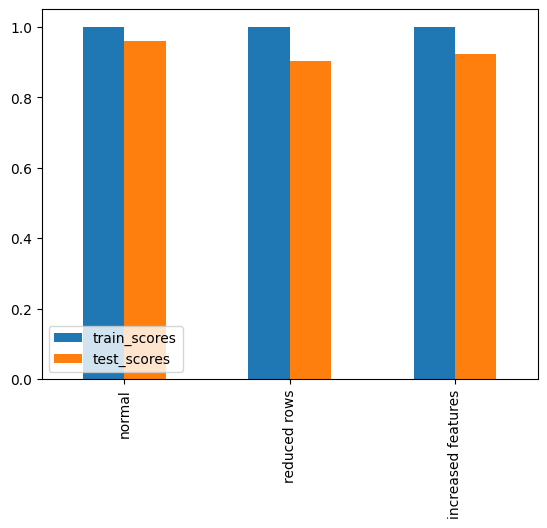

In [44]:
# plot the results

results_df.plot(kind='bar')
plt.legend(loc='lower left')
plt.show()

1. **Answer:** Adding more features to the model is considered effective.

   **Explanation:** Overfitting occurs when a model learns the training data too well, including its noise and outliers. By adding more features, the model gets exposed to a broader range of patterns in the data, making it more robust and reducing overfitting.

2. **Answer:** Reducing the amount of training data is generally not recommended.

   **Explanation:** Having a smaller training dataset may lead to underfitting, where the model fails to capture the underlying patterns. More data generally helps in training a more accurate and generalized model, preventing overfitting.

## Q2

Q2: Find out which of the statements is/are correct:
1. In case of very large values of k, we may include other classes in neighborhood.
2. In case of too small value of k, the algorithm is very sensitive to noise.

In [45]:
from sklearn.datasets import make_blobs

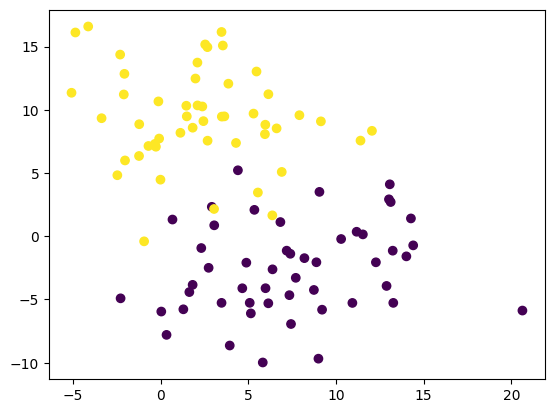

In [66]:
# genearte the data
X,y = make_blobs(n_samples=100,centers=2,
                 cluster_std=[4,4],
                 random_state=32)

# plot the scatter plot
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Increasing the value of K

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

# fit on the data
knn.fit(X,y)

# get the predictions
predictions = knn.predict(X)

# get the accuracy score
print('The accuracy scores when k=10 is',accuracy_score(y,predictions))

The accuracy scores when k=10 is 0.95


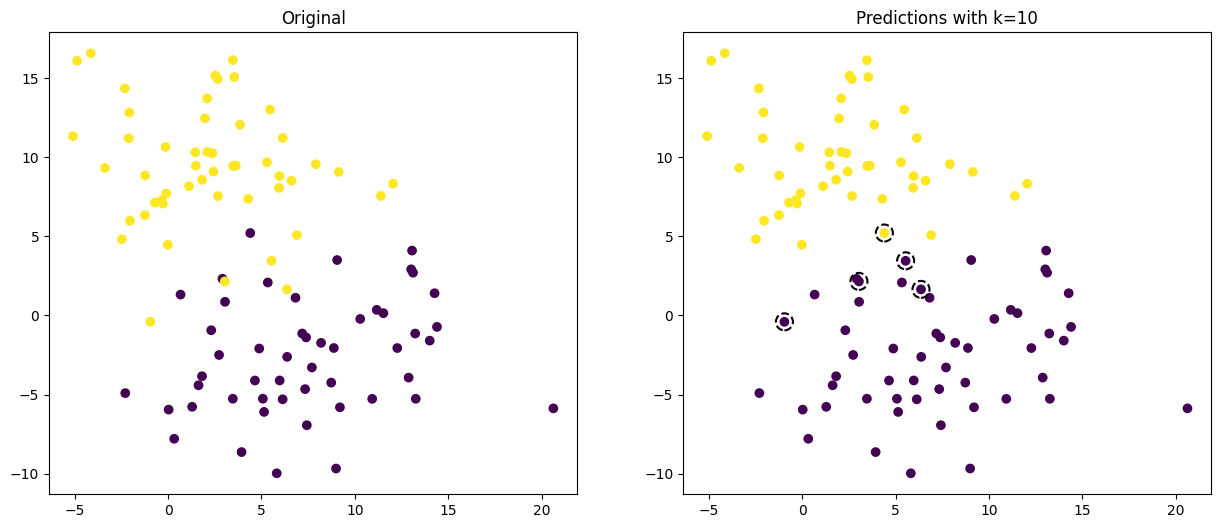

In [84]:
# plot the original and predictions graph

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set_title('Original')

ax[1].scatter(X[:,0],X[:,1],c=predictions)

# mark the error points
error = np.abs(y - predictions)
ax[1].scatter(X[error == 1,0],X[error == 1,1],c='none',s=150,edgecolors='k',linestyles='--',
              linewidths=1.5)
ax[1].set_title('Predictions with k=10')

plt.show()

**The first statement is correct**

### Reducing the value of K

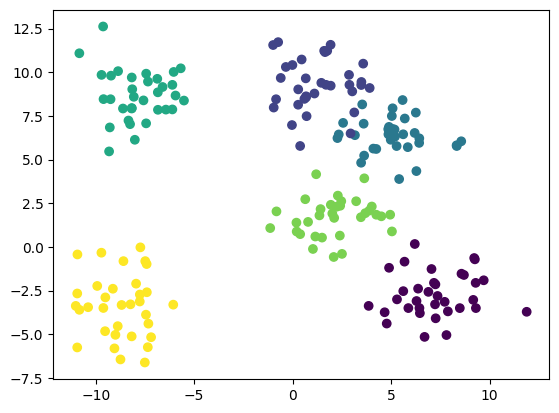

In [111]:
# reducing the value of k

# genearte the data
X,y = make_blobs(n_samples=200,centers=6,
                 cluster_std=[1.4,1.4,1.4,1.4,1.4,1.5],
                 random_state=32)

# plot the scatter plot
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# fit on the data
knn.fit(X,y)

# get the predictions
predictions = knn.predict(X)

# get the accuracy score
print('The accuracy scores when k=3 is',accuracy_score(y,predictions))

The accuracy scores when k=3 is 0.98


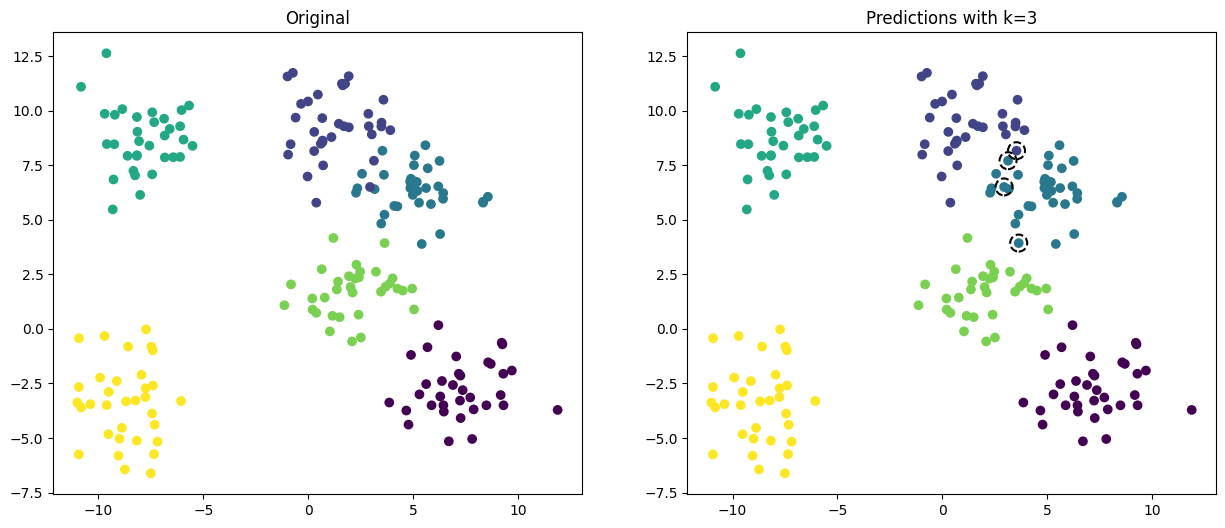

In [113]:
# plot the original and predictions graph

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set_title('Original')

ax[1].scatter(X[:,0],X[:,1],c=predictions)

# mark the error points
error = np.abs(y - predictions)
ax[1].scatter(X[error > 0,0],X[error > 0,1],c='none',s=150,edgecolors='k',linestyles='--',
              linewidths=1.5)
ax[1].set_title('Predictions with k=3')

plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


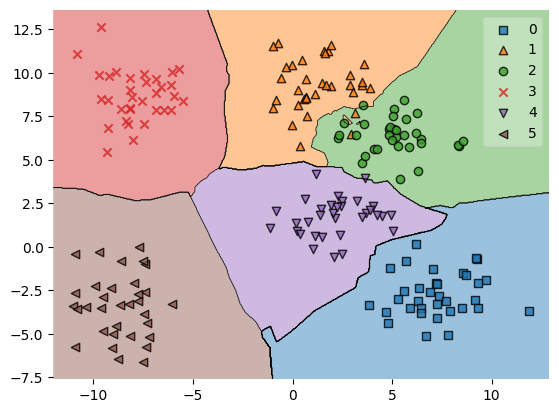

In [114]:
# plot the decision boundaries

plot_decision_regions(X=X,y=y,clf=knn)
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

# fit on the data
knn.fit(X,y)

# get the predictions
predictions = knn.predict(X)

# get the accuracy score
print('The accuracy scores when k=3 is',accuracy_score(y,predictions))

The accuracy scores when k=3 is 1.0


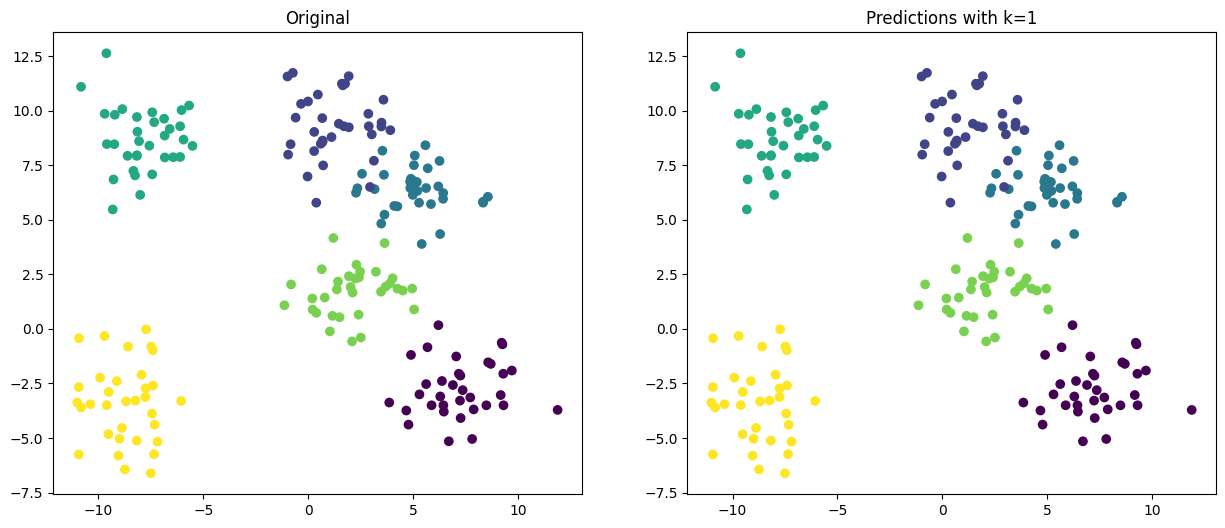

In [116]:
# plot the original and predictions graph

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set_title('Original')

ax[1].scatter(X[:,0],X[:,1],c=predictions)

# mark the error points
error = np.abs(y - predictions)
ax[1].scatter(X[error > 0,0],X[error > 0,1],c='none',s=150,edgecolors='k',linestyles='--',
              linewidths=1.5)
ax[1].set_title('Predictions with k=1')

plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


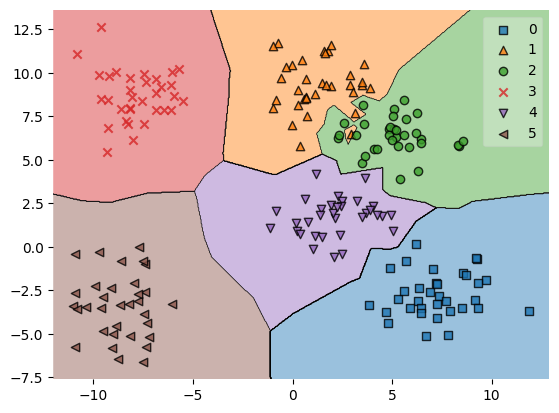

In [117]:
# plot the decision boundaries

plot_decision_regions(X=X,y=y,clf=knn)
plt.show()

**Correct Statements:**
1. **In case of very large values of k, we may include other classes in the neighborhood**.

   **Explanation:** A larger value of k in k-nearest neighbors (KNN) involves more data points in the decision-making process. If k is too large, points from other classes may influence the prediction, potentially leading to misclassifications.

2. **In case of too small value of k, the algorithm is very sensitive to noise.**

   **Explanation:** A smaller value of k means the algorithm considers fewer neighbors in making predictions. This makes the model more sensitive to the noise or outliers in the data, potentially causing overfitting and reducing generalization performance.

**When value of k=1 in KNN**

Setting k=1 in k-nearest neighbors (KNN) means that the algorithm considers only the single nearest neighbor when making predictions. The prediction for a given data point is based solely on the class or value of the closest data point in the feature space.

**Explanation:**
- **Advantage:** It can capture fine-grained patterns in the data and may perform well on complex and non-linear datasets.
  
- **Disadvantage:** The model becomes highly sensitive to noise and outliers, as it makes predictions based on a single data point. This can lead to overfitting, where the model fits the training data too closely and struggles to generalize to unseen data.

Choosing k=1 should be done cautiously, and it might not be suitable for all datasets. It's essential to consider the characteristics of the data and perform proper validation to avoid overfitting.

> In k-nearest neighbors (KNN) with k=1, the prediction for a given data point is based on its single closest neighbor in the feature space, excluding itself. The point itself is not considered when making predictions with k=1. The algorithm looks for the closest data point in the dataset, and the class or value of that nearest neighbor is used to predict the outcome for the given data point.

> In summary, when k=1 in KNN, the algorithm looks at the nearest neighbor, which is not the point itself but the closest data point in the dataset.
